In [29]:
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [1]:
# lines = [line.strip() for line in open("lm_training_dynamic.log")]
lines = [line.strip() for line in open("lm_training_dynamic_800hid.log")]

In [22]:
def parse_file(filename: str):
    lines = [line.strip() for line in open(filename)]
    data = []
    for line in lines:
        if "valid negation ppl" not in line:
            continue

        # parse epoch, valid ppl, valid negation ppl
        epoch = line.split("end of epoch")[1].split("|")[0].strip()
        valid_ppl = line.split("valid ppl")[1].split("|")[0].strip()
        valid_negation_ppl = line.split("valid negation ppl")[1].split("|")[0].strip()
        data.append([epoch, valid_ppl, valid_negation_ppl])
    data = data[:100]
    return data

In [23]:
data_200 = parse_file("lm_training_dynamic.log")
data_400 = parse_file("lm_training_dynamic_400hid.log")
data_800 = parse_file("lm_training_dynamic_800hid.log")

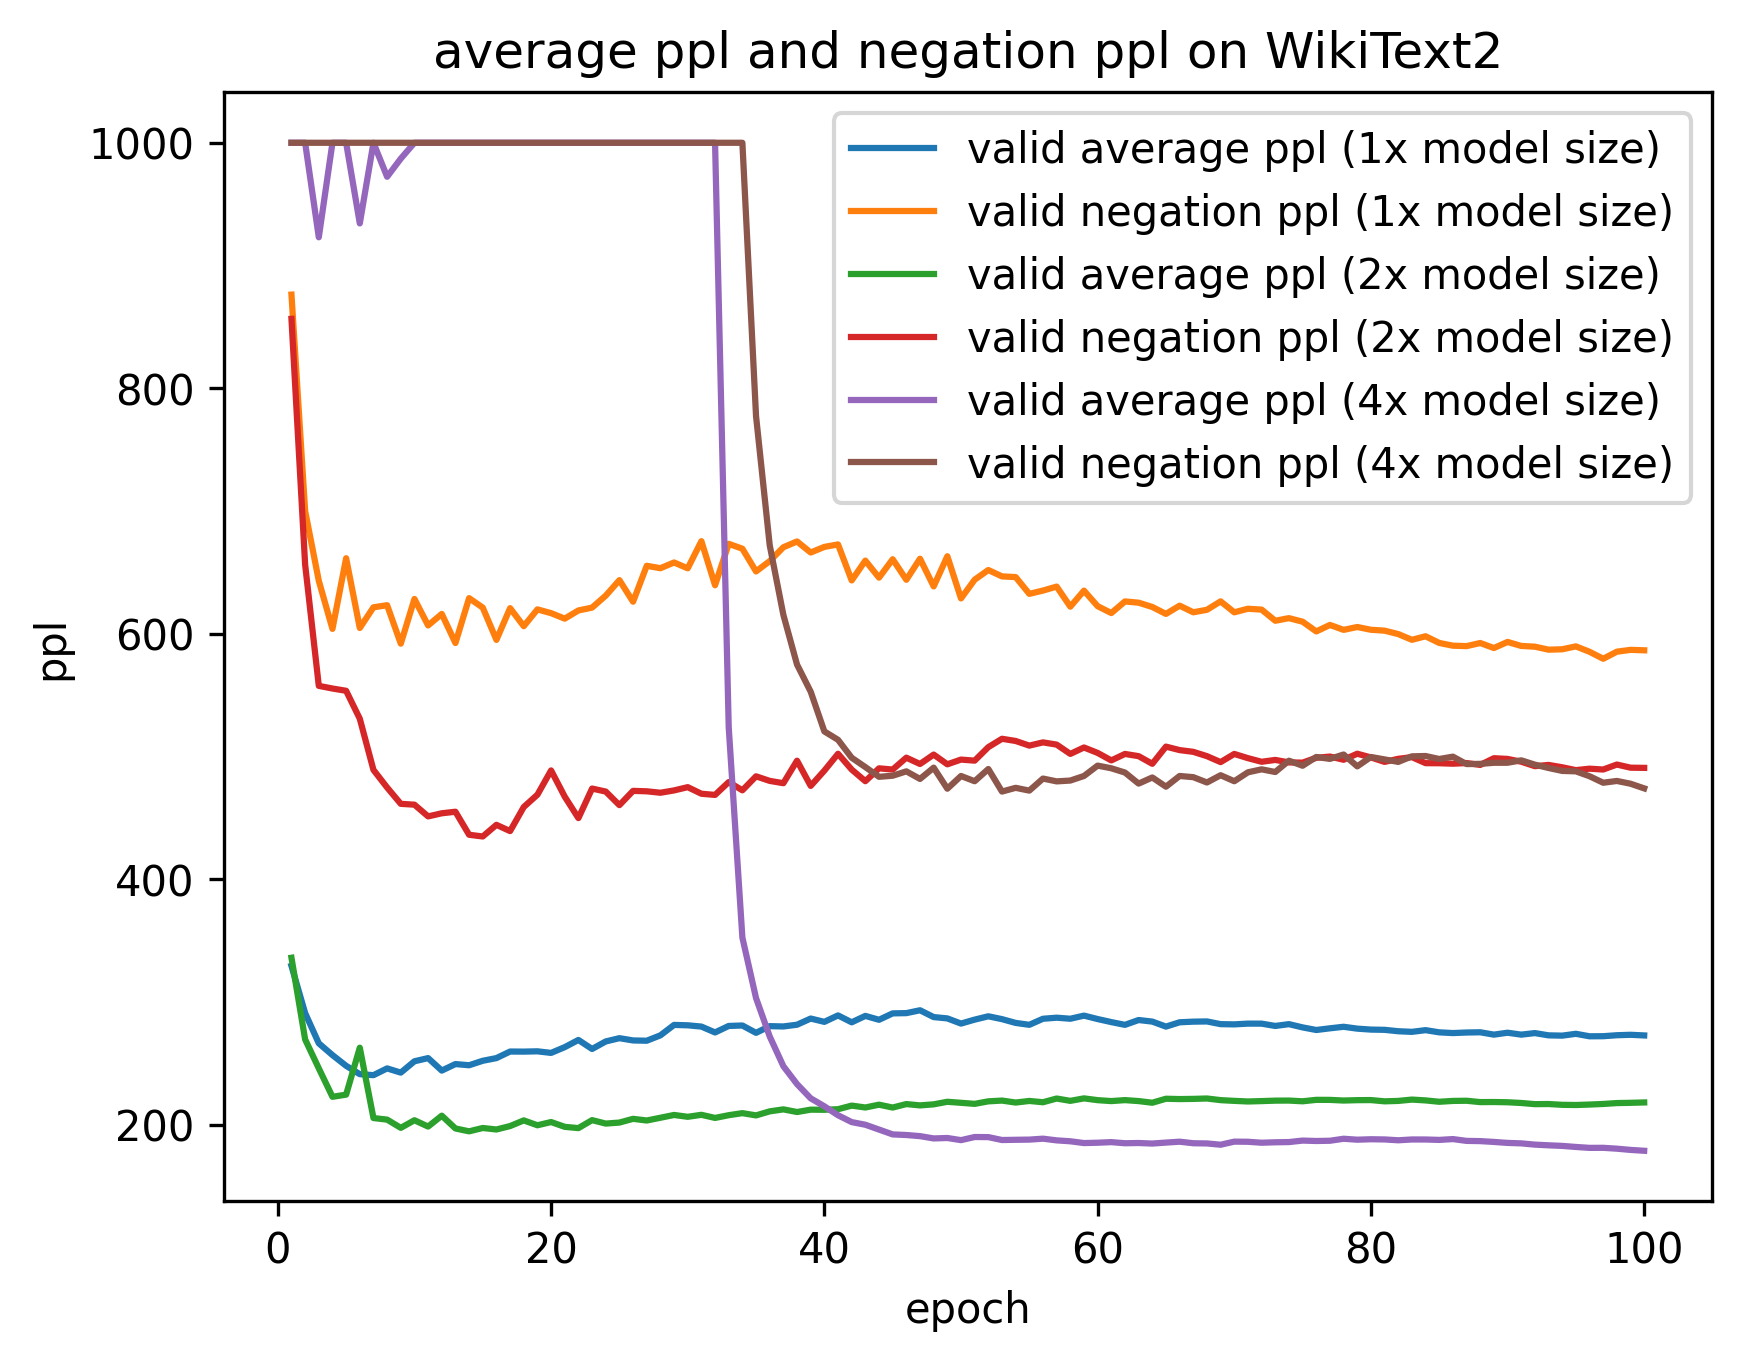

In [31]:
# plot two lines one is valid ppl - epoch, another is valid negation ppl - epoch
for hid, data in [(1, data_200), (2, data_400), (4, data_800)]:
    plt.plot([int(d[0]) for d in data], [min(1000, float(d[1])) for d in data], label=f"valid average ppl ({hid}x model size)")
    plt.plot([int(d[0]) for d in data], [min(1000, float(d[2])) for d in data], label=f"valid negation ppl ({hid}x model size)")
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("ppl")
    plt.title("average ppl and negation ppl on WikiText2")

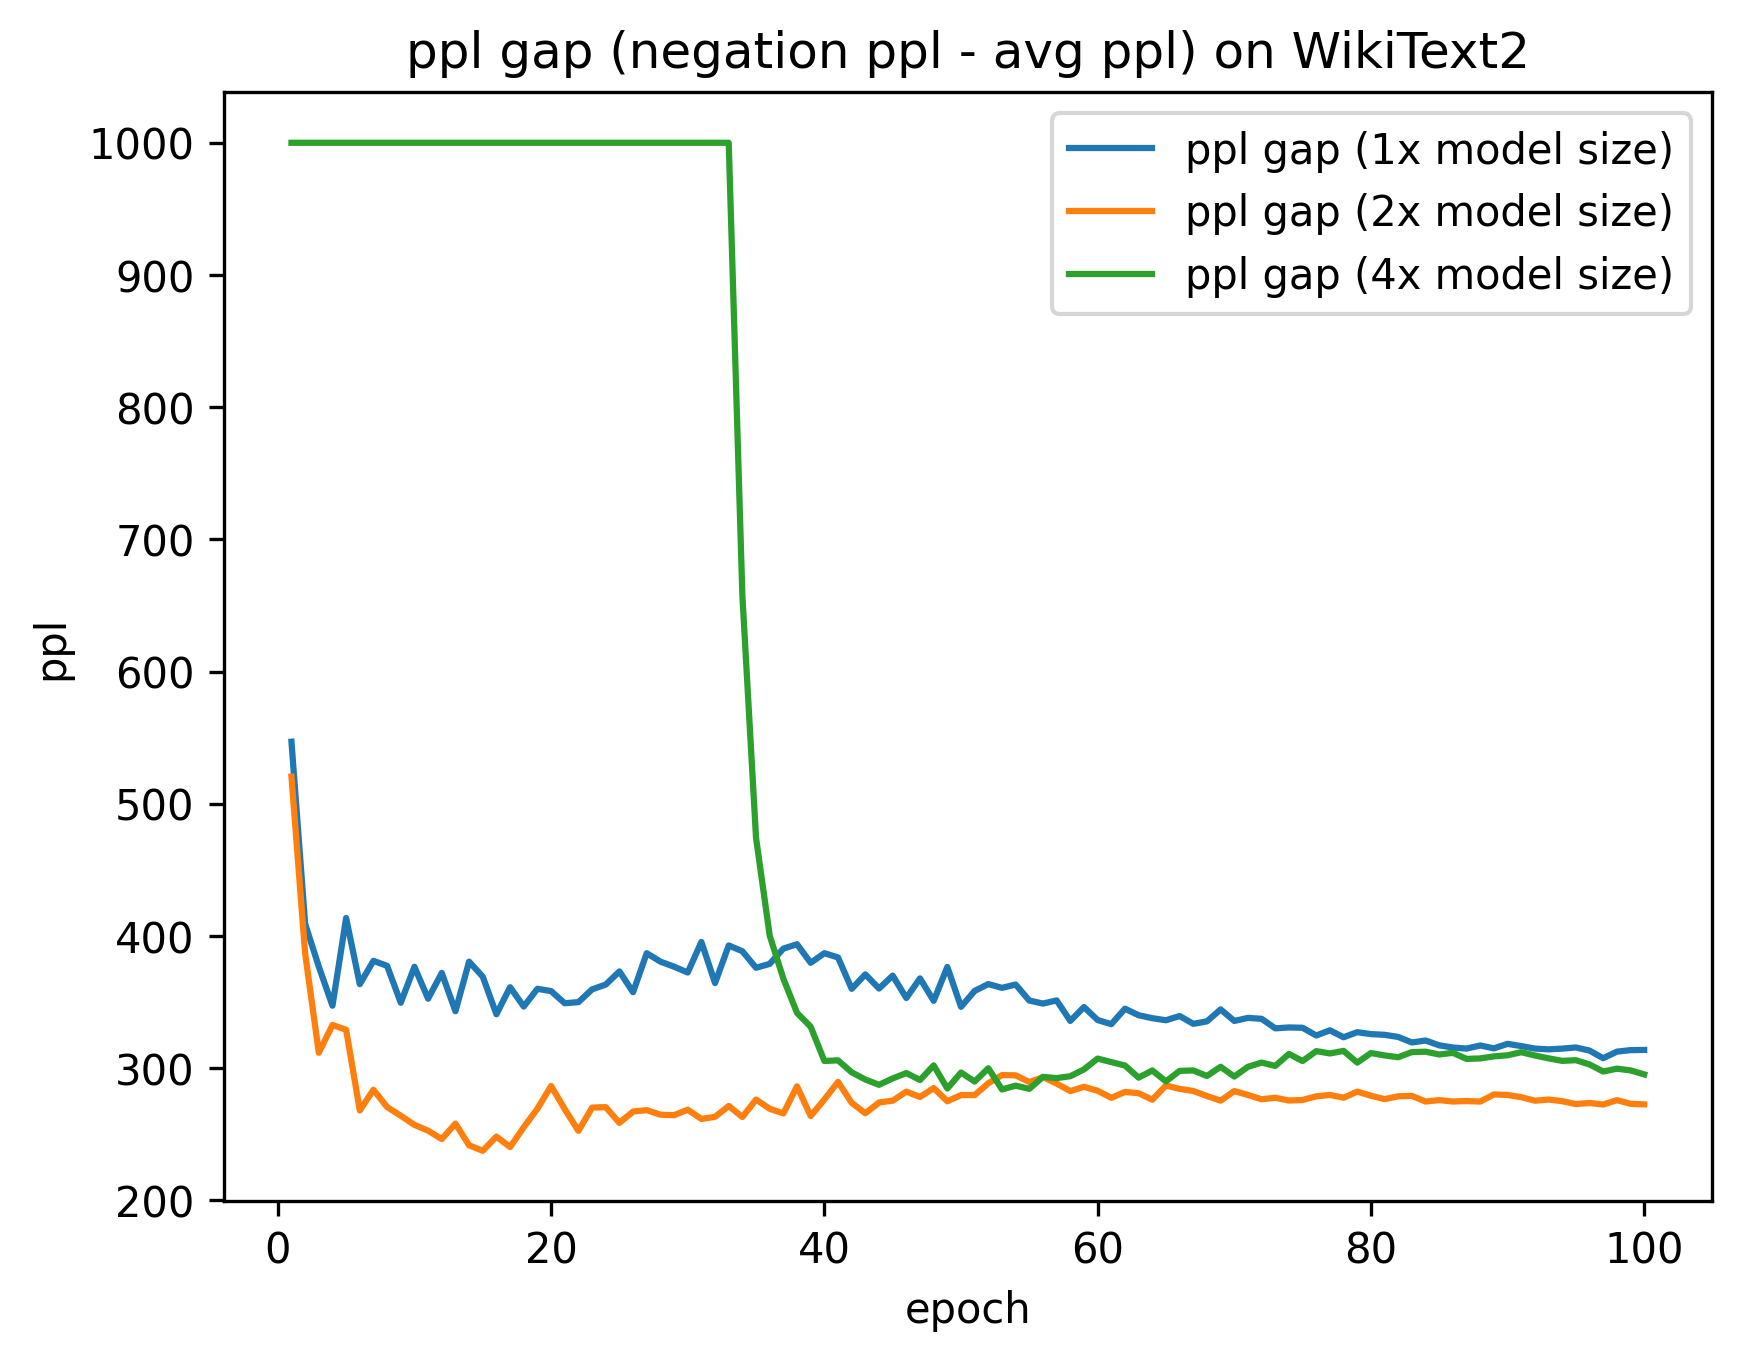

In [33]:
# plot two lines one is valid ppl - epoch, another is valid negation ppl - epoch
for hid, data in [(1, data_200), (2, data_400), (4, data_800)]:
    plt.plot([int(d[0]) for d in data], [min(1000, float(d[2]) - float(d[1])) for d in data], label=f"ppl gap ({hid}x model size)")
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("ppl")
    plt.title("ppl gap (negation ppl - avg ppl) on WikiText2")

# GPT3 outputs

In [8]:
import json
import math

In [21]:
def compute_perplexity(filename: str):
    print("Filename:", filename)
    tokens, logprobs = json.load(open(filename))

    all_logprobs = []
    negation_logprobs = []
    for i in range(len(tokens) - 1):
        if logprobs[i + 1] is None: continue
        if tokens[i] == " not":
            negation_logprobs.append(logprobs[i + 1])
        all_logprobs.append(logprobs[i + 1])

    negation_ppl = math.exp(-sum(negation_logprobs) / len(negation_logprobs))
    all_ppl = math.exp(-sum(all_logprobs) / len(all_logprobs))
    print("negation perplexity", negation_ppl)
    print("all perplexity", all_ppl)
    print("gap", negation_ppl - all_ppl)
    print()

compute_perplexity("gpt3_ada_wikitext2.json")
compute_perplexity("gpt3_babbage_wikitext2.json")
compute_perplexity("gpt3_curie_wikitext2.json")
compute_perplexity("gpt3_davinci_wikitext2.json")
compute_perplexity("gpt3_text-ada-001_wikitext2.json")
compute_perplexity("gpt3_text-babbage-001_wikitext2.json")
compute_perplexity("gpt3_text-curie-001_wikitext2.json")
compute_perplexity("gpt3_text-davinci-001_wikitext2.json")
compute_perplexity("gpt3_text-davinci-002_wikitext2.json")
compute_perplexity("gpt3_text-davinci-003_wikitext2.json")

Filename: gpt3_ada_wikitext2.json
negation perplexity 42.78025638341864
all perplexity 29.02280766710889
gap 13.75744871630975

Filename: gpt3_babbage_wikitext2.json
negation perplexity 31.75825445588014
all perplexity 21.28586585064142
gap 10.47238860523872

Filename: gpt3_curie_wikitext2.json
negation perplexity 23.769485165432
all perplexity 16.563853405128906
gap 7.205631760303092

Filename: gpt3_davinci_wikitext2.json
negation perplexity 18.82813655891992
all perplexity 12.017797522780885
gap 6.810339036139034

Filename: gpt3_text-ada-001_wikitext2.json
negation perplexity 570.2592620822384
all perplexity 243.75307379582122
gap 326.5061882864171

Filename: gpt3_text-babbage-001_wikitext2.json
negation perplexity 82.36206471866866
all perplexity 50.55900108821237
gap 31.803063630456293

Filename: gpt3_text-curie-001_wikitext2.json
negation perplexity 47.630677860554144
all perplexity 30.961630829014492
gap 16.66904703153965

Filename: gpt3_text-davinci-001_wikitext2.json
negation p